<a href="https://colab.research.google.com/github/leandrocarrinho/leandrocarrinho/blob/main/Treino_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [18]:
import keras
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



In [12]:
df = pd.read_csv('admission_dataset.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


In [20]:
y = df['Chance of Admit '] #coluna para testar
x = df.drop('Chance of Admit ', axis = 1) #eximindo a coluna do wixo x e o axis q significa que é tipo coluna

x_treino, x_teste = x[0:300], x[300:] #as 300 primeiras linhas como treino e as ultimas 100 como teste
y_treino, y_teste = y[0:300], y[300:]



In [26]:
x_treino.shape[1]

7

In [27]:
from keras.models import Sequential
from keras.layers import Dense

#Arquitetura da rede neural
modelo = Sequential()
modelo.add(Dense(units=3, activation='relu', input_dim=x_treino.shape[1]))
modelo.add(Dense(units=3, activation='linear'))

#Treinando a rede neural
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=200, batch_size=32, validation_data=(x_teste, y_teste))



Epoch 1/200
10/10 [==============================] - 1s 22ms/step - loss: 6335.9531 - mae: 65.6770 - val_loss: 6090.2407 - val_mae: 64.0182
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 5810.7041 - mae: 62.2739 - val_loss: 5583.1562 - val_mae: 60.7499
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 5328.3315 - mae: 59.2590 - val_loss: 5119.0947 - val_mae: 58.1450
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 4886.2153 - mae: 56.8157 - val_loss: 4696.4121 - val_mae: 55.7048
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 4484.3833 - mae: 54.3799 - val_loss: 4312.2793 - val_mae: 53.2747
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 4118.3755 - mae: 52.0289 - val_loss: 3963.7876 - val_mae: 51.0359
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 3787.9204 - mae: 49.8841 - val_loss: 3647.1477 - val_mae: 48.9518
Epoch 8/200
10/10 [=======

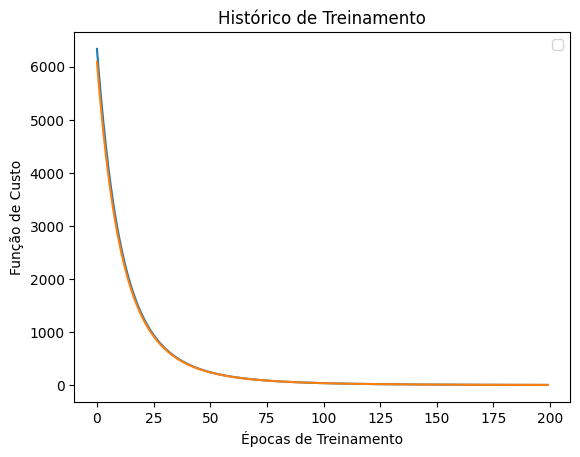

In [29]:
import matplotlib.pyplot as plt

#plotar o gráfico com o histórico de treinamento

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de Custo')
plt.xlabel('Épocas de Treinamento')
plt.legend('Erro treino', 'Erro teste')
plt.show()
